In [1]:
from Programacion import ModeloArima
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings

In [2]:
Datos = pd.read_csv('../Alemania_Reducida.csv')
Datos.set_index("2", inplace= True)

In [3]:
Palabra = [cadena for cadena in Datos.columns if "PIB (US" in cadena]

In [4]:
Palabra

['PIB (US$ a precios actuales)', 'PIB (US$ a precios constantes de 2010)']

In [5]:
Trabajable = Datos['Tasa de inactividad por edades, personas de 65 años y más (% de la población en edad de trabajar)']

In [6]:
Trabajable = Datos['PIB (US$ a precios constantes de 2010)']
Trabajable = Trabajable.dropna(axis = 0)
Trabajable

2
1970    1.398784e+12
1971    1.442604e+12
1972    1.504641e+12
1973    1.576525e+12
1974    1.590557e+12
1975    1.576771e+12
1976    1.654810e+12
1977    1.710200e+12
1978    1.761651e+12
1979    1.834766e+12
1980    1.860615e+12
1981    1.870462e+12
1982    1.863077e+12
1983    1.892372e+12
1984    1.945792e+12
1985    1.991089e+12
1986    2.036632e+12
1987    2.065189e+12
1988    2.141750e+12
1989    2.225205e+12
1990    2.342139e+12
1991    2.461782e+12
1992    2.509124e+12
1993    2.484613e+12
1994    2.544043e+12
1995    2.583326e+12
1996    2.604143e+12
1997    2.650814e+12
1998    2.704200e+12
1999    2.755235e+12
2000    2.835481e+12
2001    2.883159e+12
2002    2.877451e+12
2003    2.857305e+12
2004    2.890881e+12
2005    2.912034e+12
2006    3.023170e+12
2007    3.113153e+12
2008    3.143036e+12
2009    2.964077e+12
2010    3.087972e+12
2011    3.209180e+12
2012    3.222611e+12
2013    3.236713e+12
2014    3.308229e+12
2015    3.357586e+12
2016    3.432460e+12
2017    3.5

In [7]:
Modelo = ModeloArima(Trabajable)

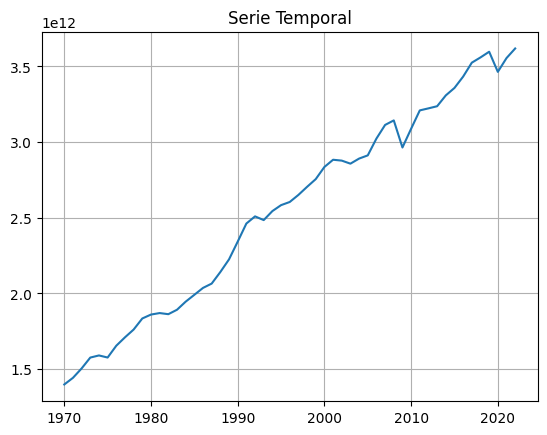

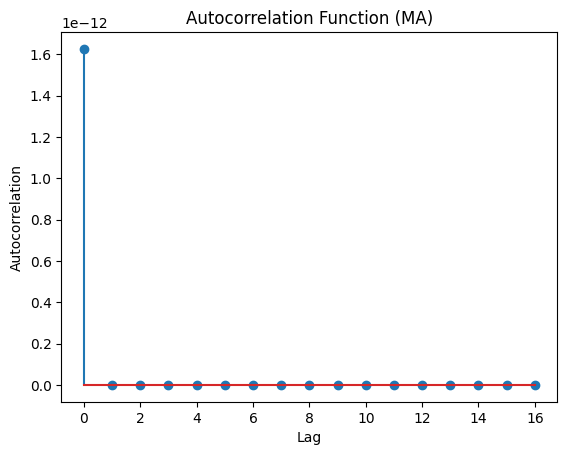

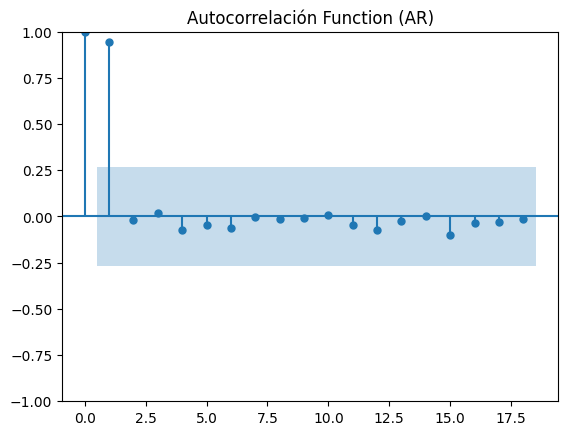

In [8]:
Modelo.Graficos()

In [9]:
import subprocess
warnings.filterwarnings('ignore')
Modelo.Pruebatoolkit(8)
warnings.resetwarnings()

Mejor orden encontrado: (2, 0, 1) con AIC: 2791.233358771814


In [10]:
warnings.filterwarnings('ignore')
Modelo.ModeloARMA(1,1)
print(Modelo.summary)
warnings.resetwarnings()

                                         SARIMAX Results                                          
Dep. Variable:     PIB (US$ a precios constantes de 2010)   No. Observations:                   53
Model:                                     ARIMA(1, 0, 1)   Log Likelihood               -1396.747
Date:                                    Fri, 24 Nov 2023   AIC                           2801.494
Time:                                            13:28:41   BIC                           2809.376
Sample:                                                 0   HQIC                          2804.525
                                                     - 53                                         
Covariance Type:                                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.552e+12   1.38e-15   1.85e+27      0

In [11]:
Resultados = Modelo.results
Prediccion = Resultados.fittedvalues

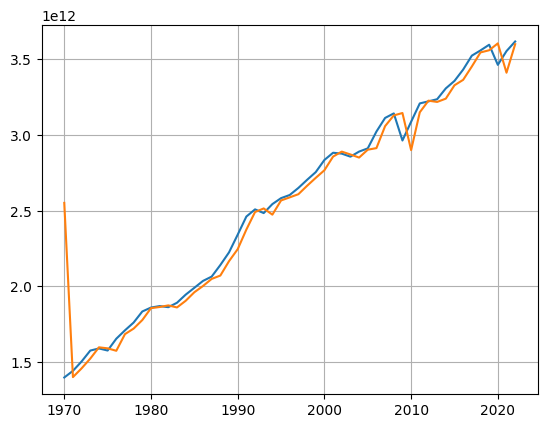

In [12]:
plt.plot(Trabajable, label = 'Datos')
plt.plot(Trabajable.index,Prediccion, label = 'Prediccion')
plt.grid()
plt.show()


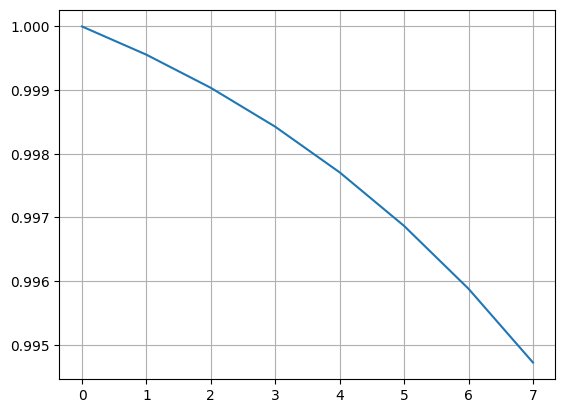

In [13]:
b_t = 1
r = 0.15
gamma = -0.02
deficit = -0.2
b = []
t = []
for i in range(8):
    t.append(i)
    b.append(b_t)
    b_t= deficit/(1 + r) + (1 + (r-gamma)/(1+gamma))*b_t

dt = pd.DataFrame({'tiempo':t,'deuda':b})
plt.plot(dt['tiempo'], dt['deuda'])
plt.grid()
plt.show()

In [14]:
Deuda_Publica = 0.6
Interes = 0.1
Deficit_Primario = -0.04
Tasa_Crecimiento = 0.03333333333333333333333333
for i in range(10):
    Deuda_Publica = (Deficit_Primario/(1+Tasa_Crecimiento)) + (((Interes-Tasa_Crecimiento)/(1+Tasa_Crecimiento)) + 1)*Deuda_Publica
    print(Deuda_Publica)

0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
0.6
